# Random Forest Regression

## Auto format

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

## Import necessary modules

In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing

<IPython.core.display.Javascript object>

## Load data

In [3]:
df = pd.read_csv("../data/boston_house_prices.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<IPython.core.display.Javascript object>

## Standard scaler

In [4]:
# scaler = sklearn.preprocessing.MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# df

<IPython.core.display.Javascript object>

## Split data

In [5]:
X = df.drop(columns="MEDV")
Y = df["MEDV"]

<IPython.core.display.Javascript object>

## Performance evaluation criteria

In [6]:
def performance_evaluate(Y_true, Y_predicted):
    R2_score = sklearn.metrics.r2_score(Y_true, Y_predicted)
    MSE_score = sklearn.metrics.mean_squared_error(Y_true, Y_predicted)
    MAPE_score = sklearn.metrics.mean_absolute_percentage_error(Y_true, Y_predicted)
    return {"R2": R2_score, "MSE": MSE_score, "MAPE": MAPE_score}

<IPython.core.display.Javascript object>

## Train, test split

In [7]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=0
)

<IPython.core.display.Javascript object>

## Pairs plot

In [8]:
def pairs_plot(df, line_length=5, kind="scatter"):
    for i in range(0, len(df.columns), line_length):
        sns.pairplot(
            df,
            x_vars=df.columns[i : min(i + line_length, len(df.columns))],
            y_vars="MEDV",
            kind=kind,
        )

<IPython.core.display.Javascript object>

### Train set

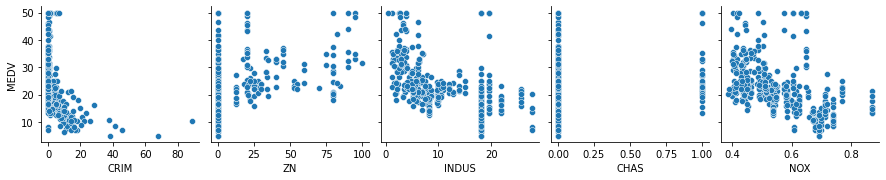

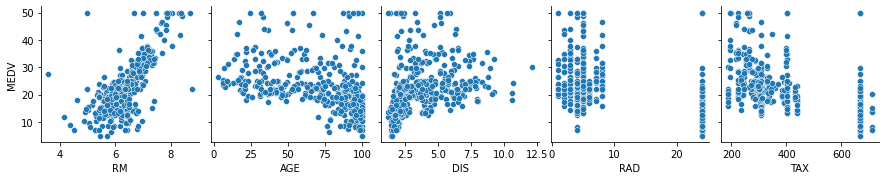

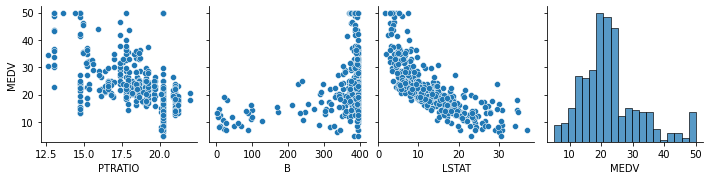

<IPython.core.display.Javascript object>

In [9]:
df_train = X_train.copy()
df_train["MEDV"] = Y_train
pairs_plot(df_train)

### Test set

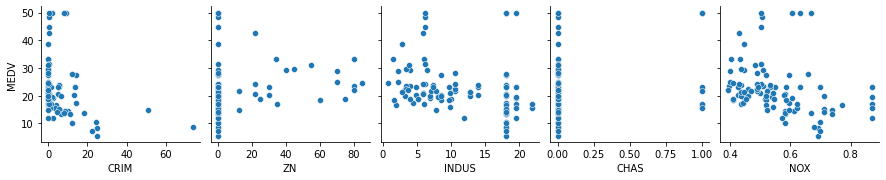

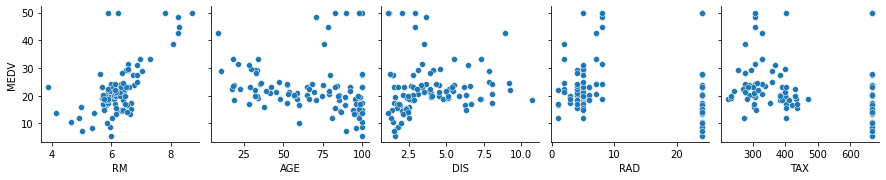

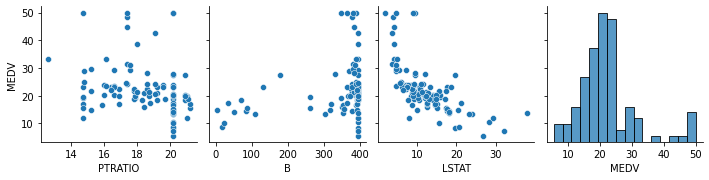

<IPython.core.display.Javascript object>

In [10]:
df_test = X_test.copy()
df_test["MEDV"] = Y_test
pairs_plot(df_test)

## Baseline

In [11]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, Y_train)

df_result = pd.DataFrame()
df_result["Metric"] = performance_evaluate(
    np.array([0, 0, 0]), np.array([0, 0, 0])
).keys()

Y_pred = model.predict(X_train)
df_result["Train"] = performance_evaluate(Y_true=Y_train, Y_predicted=Y_pred).values()

Y_pred = model.predict(X_test)
df_result["Test"] = performance_evaluate(Y_true=Y_test, Y_predicted=Y_pred).values()

df_result

,Metric,Train,Test
0,R2,0.773014,0.589222
1,MSE,19.326470,33.448980
2,MAPE,0.153729,0.183563


<IPython.core.display.Javascript object>

## Kmeans

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
221,0.004894,0.00,0.202222,0.0,0.244856,0.566667,0.190525,0.203658,0.304348,0.229008,0.510638,0.958243,0.049458,0.605023
59,0.001090,0.25,0.162593,0.0,0.139918,0.419953,0.456231,0.527322,0.304348,0.185115,0.755319,1.000000,0.201167,0.333333
154,0.015820,0.00,0.697778,1.0,1.000000,0.467371,0.958805,0.055726,0.173913,0.412214,0.223404,0.808664,0.365101,0.273973
65,0.000332,0.80,0.097407,0.0,0.026749,0.505164,0.153450,0.498157,0.130435,0.286260,0.372340,1.000000,0.074743,0.422374
295,0.000772,0.33,0.053333,0.0,0.179012,0.770423,0.710608,0.178552,0.260870,0.066794,0.617021,1.000000,0.124757,0.648402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.000349,0.00,0.164815,0.0,0.267490,0.509859,0.366632,0.484226,0.173913,0.070611,0.808511,0.981088,0.132537,0.358447
192,0.000352,0.80,0.028889,0.0,0.039095,0.736150,0.364573,0.561627,0.043478,0.270992,0.000000,0.988149,0.128925,0.675799
117,0.001626,0.00,0.343333,0.0,0.333333,0.442019,0.820803,0.146540,0.217391,0.467557,0.553191,0.993973,0.231175,0.324201
47,0.002506,0.00,0.228519,0.0,0.129630,0.444131,0.850669,0.414250,0.086957,0.087786,0.563830,0.989510,0.467352,0.264840


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
446,0.035487,0.0,0.642963,0.0,0.555556,0.380516,0.466529,0.175577,1.000000,0.914122,0.808511,0.842403,0.337594,0.340183
456,0.071786,0.0,0.642963,0.0,0.409465,0.475117,0.973223,0.097275,1.000000,0.914122,0.808511,0.762620,0.614615,0.189498
385,0.466707,0.0,0.642963,0.0,0.633745,0.326995,0.849640,0.042804,1.000000,0.914122,0.808511,0.829946,0.705752,0.079909
360,0.200746,0.0,0.642963,0.0,0.588477,0.489437,1.000000,0.022667,1.000000,0.914122,0.808511,0.992032,0.550153,0.118721
377,0.065929,0.0,0.642963,0.0,0.633745,0.532160,0.958805,0.049120,1.000000,0.914122,0.808511,1.000000,0.483190,0.171233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,0.079174,0.0,0.642963,0.0,0.471193,0.461268,0.846550,0.080513,1.000000,0.914122,0.808511,0.005547,0.592109,0.191781
471,0.002261,0.0,1.000000,0.0,0.460905,0.224178,0.979403,0.062387,0.130435,1.000000,0.797872,0.802133,0.769658,0.070776
473,0.001180,0.0,1.000000,0.0,0.460905,0.433099,0.830072,0.088530,0.130435,1.000000,0.797872,1.000000,0.315921,0.344749
396,0.203196,0.0,0.642963,0.0,0.604938,0.538967,1.000000,0.063488,1.000000,0.914122,0.808511,0.067906,0.752153,0.050228


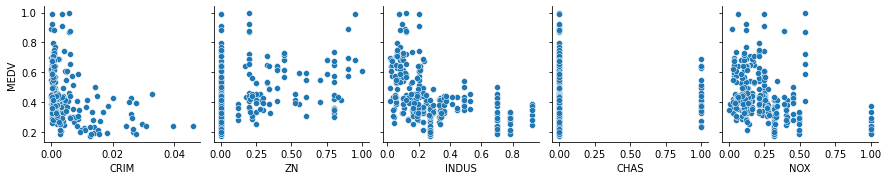

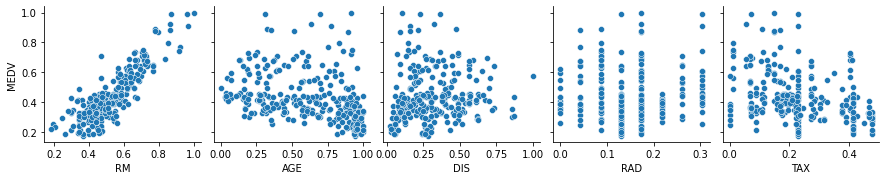

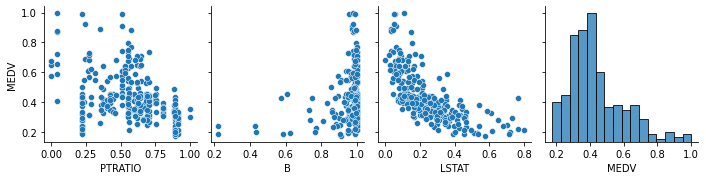

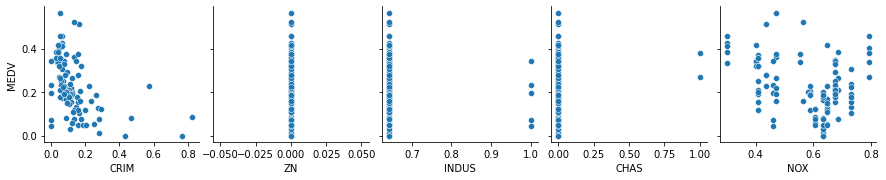

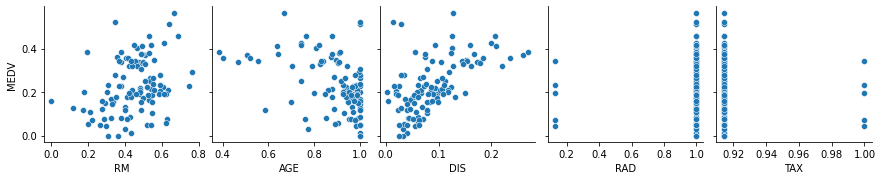

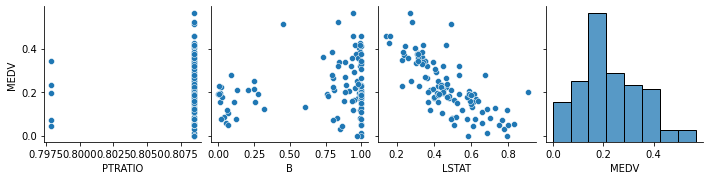

<IPython.core.display.Javascript object>

In [15]:
from sklearn.cluster import KMeans
import numpy as np


df = pd.read_csv("../data/boston_house_prices_processed.csv")

scaler = sklearn.preprocessing.MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

X = df.drop(columns="MEDV")
Y = df["MEDV"]

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=0
)
df_train = X_train.copy()
df_train["MEDV"] = Y_train

kmeans = KMeans(n_clusters=2, random_state=0).fit(
    X_train[["INDUS", "CHAS", "RAD", "TAX", "B"]]
)

cluster = [None] * kmeans.n_clusters
for i in range(kmeans.n_clusters):
    cluster[i] = df_train[kmeans.labels_ == i]
    display(cluster[i])
    pairs_plot(cluster[i])